In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt




In [ ]:
# Load CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# Convert labels to one-hot encoding
train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)


170498071/170498071 [==============================] - 3s 0us/step


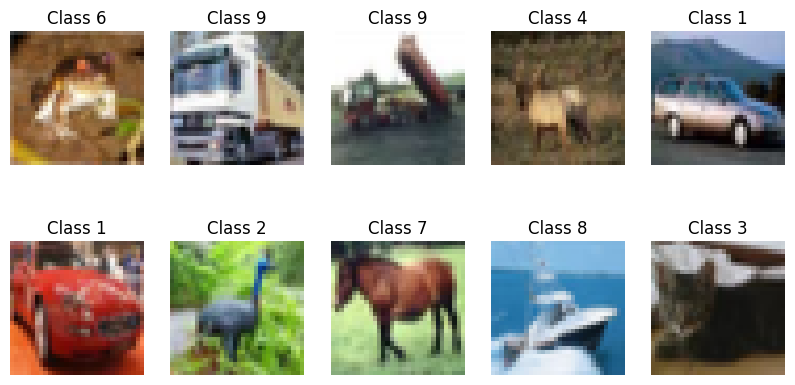

In [ ]:
# Display a few preprocessed images
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(train_images[i])
    plt.title(f"Class {np.argmax(train_labels[i])}")
    plt.axis('off')
plt.show()

In [ ]:
# Create a VGG16 model
base_model = VGG16(include_top=False, weights='imagenet', input_shape=(32, 32, 3))

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
# Freeze the pre-trained layers so they are not trainable
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))


In [ ]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
# Train the model
history = model.fit(train_images, train_labels, epochs=10, batch_size=128, validation_data=(test_images, test_labels))


Epoch 1/10
391/391 [==============================] - 1000s 3s/step - loss: 1.5225 - accuracy: 0.4624 - val_loss: 1.2860 - val_accuracy: 0.5481
Epoch 2/10
391/391 [==============================] - 1030s 3s/step - loss: 1.2673 - accuracy: 0.5558 - val_loss: 1.2021 - val_accuracy: 0.5792
Epoch 3/10
391/391 [==============================] - 1053s 3s/step - loss: 1.1849 - accuracy: 0.5857 - val_loss: 1.1645 - val_accuracy: 0.5897
Epoch 4/10
391/391 [==============================] - 1027s 3s/step - loss: 1.1301 - accuracy: 0.6055 - val_loss: 1.1274 - val_accuracy: 0.6049
Epoch 5/10
391/391 [==============================] - 1033s 3s/step - loss: 1.0872 - accuracy: 0.6180 - val_loss: 1.1094 - val_accuracy: 0.6115
Epoch 6/10
391/391 [==============================] - 1027s 3s/step - loss: 1.0513 - accuracy: 0.6316 - val_loss: 1.0910 - val_accuracy: 0.6191
Epoch 7/10
391/391 [==============================] - 1022s 3s/step - loss: 1.0219 - accuracy: 0.6416 - val_loss: 1.0784 - val_accuracy:

In [ ]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose=2)
print(f'Test accuracy: {test_accuracy * 100:.2f}%')

313/313 - 133s - loss: 1.0552 - accuracy: 0.6344 - 133s/epoch - 426ms/step
Test accuracy: 63.44%


In [ ]:
# Predict labels for a few test images
num_images_to_display = 5
test_images = test_images[:10]
predicted_labels = model.predict(test_images)

1/1 [==============================] - 0s 485ms/step


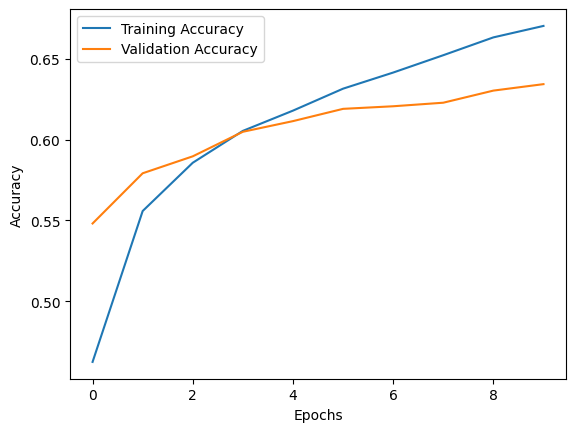

In [ ]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

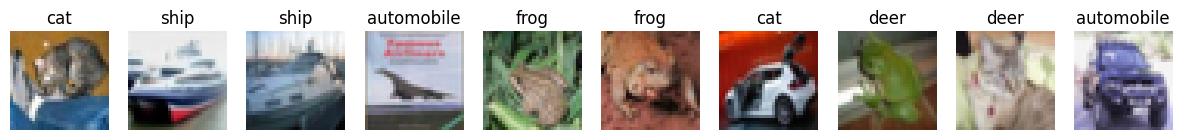

1/1 [==============================] - 0s 48ms/step


<ipython-input-14-dbf24ee98238>:16: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 5, i + 1)


1/1 [==============================] - 0s 45ms/step


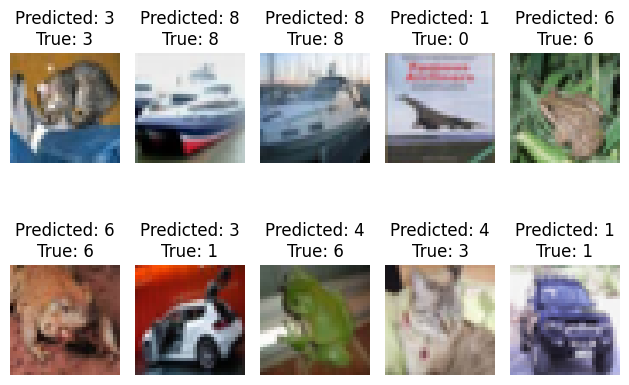

In [ ]:
# Display the test images along with their predicted labels
class_names = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

plt.figure(figsize=(15, 5))
for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.imshow(test_images[i])
    predicted_class_index = np.argmax(predicted_labels[i])
    plt.title(class_names[predicted_class_index])
    plt.axis('off')

plt.show()

plt.subplot(1, 2, 2)
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(test_images[i])
    predicted_label = np.argmax(model.predict(np.expand_dims(test_images[i], axis=0)))
    true_label = np.argmax(test_labels[i])
    plt.title(f"Predicted: {predicted_label}\nTrue: {true_label}")
    plt.axis('off')
plt.tight_layout()
plt.show()